In [1]:
from google.colab import files
upload = files.upload()

Saving Advanced Soybean_1.csv to Advanced Soybean_1.csv


In [2]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(upload["Advanced Soybean_1.csv"]))

In [3]:
df.head()

,Parameters,Random,Number of Pods (NP),Biological Weight (BW),Sugars (Su),Relative Water Content in Leaves (RWCL),ChlorophyllA663,Chlorophyllb649,Protein Percentage (PPE),Weight of 300 Seeds (W3S),Leaf Area Index (LAI),Number of Seeds per Pod (NSP),Protein Content (PCO),Seed Yield per Unit Area (SYUA),Plant Height (PH)
0,C1S1G5,R1,130.3,111.0,433.00,732.0,1.4,3.1,33.2,33.6,0.08,1.86,82.0,133943600.0,50.5
1,C2S3G4,R1,132.0,80.0,334.00,674.0,7.1,2.2,38.5,34.4,0.09,1.87,13.0,12613100.0,44.5
2,C2S1G6,R1,150.0,83.0,0.49,677.0,1.8,1.3,33.6,35.2,0.07,2.04,15.0,88626100.0,52.2
3,C1S1G1,R1,140.8,66.0,163.00,745.0,1.1,3.0,33.5,52.3,0.09,2.20,14.0,157577800.0,50.5
4,C1S2G6,R2,175.6,73.0,795.00,725.0,7.5,2.1,39.6,31.2,0.10,1.88,6.0,72960400.0,49.2


In [4]:
df.tail()

,Parameters,Random,Number of Pods (NP),Biological Weight (BW),Sugars (Su),Relative Water Content in Leaves (RWCL),ChlorophyllA663,Chlorophyllb649,Protein Percentage (PPE),Weight of 300 Seeds (W3S),Leaf Area Index (LAI),Number of Seeds per Pod (NSP),Protein Content (PCO),Seed Yield per Unit Area (SYUA),Plant Height (PH)
55445,C1S1G2,R1,136.0,223.0,523.0,713.0,1.9,3.3,38.2,38.1,0.07,2.06,5.0,121117700.0,52.4
55446,C1S1G6,R1,145.0,111.0,466.0,756.0,1.4,2.2,37.7,28.8,0.09,1.84,44.0,47886600.0,45.7
55447,C1S2G2,R1,166.3,85.0,523.0,676.0,8.5,1.3,36.5,35.2,0.08,2.20,58.0,89798000.0,50.0
55448,C1S2G3,R3,209.0,132.0,663.0,875.0,9.0,1.3,39.7,31.2,0.06,2.60,32.0,93958800.0,44.0
55449,C2S3G3,R1,127.0,124.0,322.0,612.0,9.9,2.1,35.4,33.3,0.04,1.86,4.0,117732900.0,50.0


In [6]:
df.dtypes

,0
Parameters,object
Random,object
Number of Pods (NP),float64
Biological Weight (BW),float64
Sugars (Su),float64
Relative Water Content in Leaves (RWCL),float64
ChlorophyllA663,float64
Chlorophyllb649,float64
Protein Percentage (PPE),float64
Weight of 300 Seeds (W3S),float64


Mean Absolute Error (MAE) : 2.1391447445650136
Mean Squared Error (MSE) : 7.68247685943605
R2 score : 0.19455727870331374


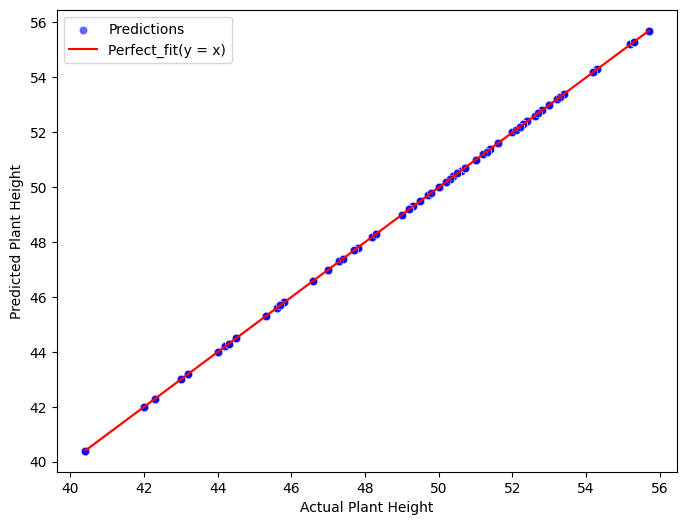

In [12]:
# Creating Predictive model that how well the soybean plant will grow in different conditions.
# Importing Libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Loading Dataset
file_path = "/content/Advanced Soybean_1.csv"
df = pd.read_csv(file_path)

# Selecting features and target
features = [
           "Number of Pods (NP)",
           "Biological Weight (BW)",
           "Sugars (Su)",
            "Relative Water Content in Leaves (RWCL)",
            "ChlorophyllA663",
            "Chlorophyllb649",
            "Protein Percentage (PPE)",
            "Weight of 300 Seeds (W3S)",
            "Number of Seeds per Pod (NSP)",
            "Protein Content (PCO)",
            ]

target = "Plant Height (PH)"

# Splitting the Data
x = df[features]
y = df[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Training the model
model = LinearRegression()
model.fit(x_train_scaled, y_train)

# Making prediction
y_pred = model.predict(x_test_scaled)

# Evaluating the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE) : {mae}")
print(f"Mean Squared Error (MSE) : {mse}")
print(f"R2 score : {r2}")

# Scatter Plot of actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x = y_test, y = y_test, color = "blue", alpha = 0.6, label = "Predictions")
sns.lineplot(x = y_test, y = y_test, color = "red", label = "Perfect_fit(y = x)")
plt.xlabel("Actual Plant Height")
plt.ylabel("Predicted Plant Height")
plt.legend()
plt.show()